TITLE: Omni_Krypto_10

Project Team Members: Chris Diaz, Jaime Leon, Yutika Misra, Griselda Ramos

Motivation & Summary Slide

Define the core message or hypothesis of your project.

Due to the spike of the cryptocurrency market (aka Crypto-boom), many investors have been pivoting away from traditional stock and bond portfolios and allocating their assets into various cryptocurrencies. Cryptocurrency by nature is high risk, high reward, yet the question remains, what coin should I invest in?

Many investors want to invest in crypto however do not have the time or resources to do the proper due diligence
neccessary to create a diversified "crypto" portfolio. Our project is focused on developing three different crypto-currency portfolios ranging from conservative to high risk. Our goal is to present analysis for the investor to choose a uniquely designed portfolio that best fits their risk tolerance and investment needs.

Omni_Krypto_10 is separated into three distinct portfolios: Omni-Krypto Blue (Conservative), Omni-Krypto Yellow (Moderate), and Omni-Krypto Green (Aggressive).
        

We have run analysis on 10 coins that will be utilized in each portfolio. 
    

Describe the questions you asked, and why you asked them.
Describe whether you were able to answer these questions to your satisfaction, and briefly summarize your findings.


Calculations: daily returns, coorelation & heatmap, dominance

In [148]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from MCForecastTools import MCSimulation

In [171]:
# import files

binance_data = Path("crypto_dataset/Binance_Coin.csv")
binance = pd.read_csv(binance_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
binance.drop(columns=['SNo', "Vol." ],inplace=True)
binance.rename(columns = {'Price':'close'}, inplace = True)
binance.sort_values('Date', ascending=True).dropna()
binance.columns = pd.MultiIndex.from_product([['Binance'], binance.columns])


bitcoin_data = Path("crypto_dataset/Bitcoin.csv")
bitcoin = pd.read_csv(bitcoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
bitcoin.drop(columns=['SNo', "Vol." ],inplace=True)
bitcoin.rename(columns = {'Price':'close'}, inplace = True)
bitcoin.sort_values('Date', ascending=True).dropna()
bitcoin.columns = pd.MultiIndex.from_product([['Bitcon'], bitcoin.columns])


cardano_data = Path("crypto_dataset/Cardano.csv")
cardano = pd.read_csv(cardano_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cardano.drop(columns=['SNo', "Vol." ],inplace=True)
cardano.rename(columns = {'Price':'close'}, inplace = True)
cardano.sort_values('Date', ascending=True).dropna()
cardano.columns = pd.MultiIndex.from_product([['Cardano'], cardano.columns])

dogecoin_data = Path("crypto_dataset/dogecoin.csv")
dogecoin = pd.read_csv(dogecoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
dogecoin.drop(columns=['SNo', "Vol." ],inplace=True)
dogecoin.rename(columns = {'Price':'close'}, inplace = True)
dogecoin.sort_values('Date', ascending=True).dropna()
dogecoin.columns = pd.MultiIndex.from_product([['Dogecoin'], dogecoin.columns])


ethereum_data = Path("crypto_dataset/ethereum.csv")
ethereum = pd.read_csv(ethereum_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
ethereum.drop(columns=['SNo', "Vol." ],inplace=True)
ethereum.rename(columns = {'Price':'close'}, inplace = True)
ethereum.sort_values('Date', ascending=True).dropna()
ethereum.columns = pd.MultiIndex.from_product([['Ethereum'], ethereum.columns])


iota_data = Path("crypto_dataset/iota.csv")
iota = pd.read_csv(iota_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
iota.drop(columns=['SNo', "Vol." ],inplace=True)
iota.rename(columns = {'Price':'close'}, inplace = True)
iota.sort_values('Date', ascending=True).dropna()
iota.columns = pd.MultiIndex.from_product([['Iota'], iota.columns])


litecoin_data = Path("crypto_dataset/litecoin.csv")
litecoin = pd.read_csv(litecoin_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
litecoin.drop(columns=['SNo', "Vol." ],inplace=True)
litecoin.rename(columns = {'Price':'close'}, inplace = True)
litecoin.sort_values('Date', ascending=True).dropna()
litecoin.columns = pd.MultiIndex.from_product([['Litecoin'], litecoin.columns])

monero_data = Path("crypto_dataset/monero.csv")
monero = pd.read_csv(monero_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
monero.drop(columns=['SNo', "Vol." ],inplace=True)
monero.rename(columns = {'Price':'close'}, inplace = True)
monero.sort_values('Date', ascending=True).dropna()
monero.columns = pd.MultiIndex.from_product([['Monero'], monero.columns])

stellar_data = Path("crypto_dataset/stellar.csv")
stellar = pd.read_csv(stellar_data, infer_datetime_format=True, parse_dates=True,index_col="Date")
stellar.drop(columns=['SNo', "Vol." ],inplace=True)
stellar.rename(columns = {'Price':'close'}, inplace = True)
stellar = stellar.sort_values('Date', ascending=True).dropna()
stellar.columns = pd.MultiIndex.from_product([['Stellar'], stellar.columns])



xpr_data = Path("crypto_dataset/XPR.csv")
xpr = pd.read_csv(xpr_data, infer_datetime_format=True, parse_dates=True,index_col="Date")
xpr.drop(columns=['SNo', "Vol." ],inplace=True)
xpr.rename(columns = {'Price':'close'}, inplace = True)
xpr = xpr.sort_values('Date', ascending=True).dropna()
xpr.columns = pd.MultiIndex.from_product([['XPR'], xpr.columns])

xpr

XPR                                    
              close     Open     High      Low Change %
Date                                                   
2018-01-01  2.05000  1.98000  2.09000  1.81000     3.54
2018-01-02  2.19000  2.05000  2.21000  1.89000     6.83
2018-01-03  2.73000  2.19000  2.85000  2.15000    24.66
2018-01-04  2.73000  2.73000  3.29000  2.58000     0.00
2018-01-05  2.51000  2.73000  3.05000  2.24000    -8.06
...             ...      ...      ...      ...      ...
2021-08-20  1.26318  1.23482  1.28762  1.19994     2.29
2021-08-21  1.21663  1.26316  1.28262  1.20444    -3.69
2021-08-22  1.22574  1.21654  1.25540  1.18284     0.75
2021-08-23  1.24617  1.22577  1.30288  1.21150     1.67
2021-08-24  1.24856  1.24630  1.26486  1.21836     0.19

[1332 rows x 5 columns]

In [172]:
#Concat all coin prices into one data frame
#
# combined_df = pd.concat([binance, bitcoin,cardano,dogecoin,ethereum,iota,litecoin,monero,stellar,xpr],
#              axis="columns", join="inner")
# combined_df.head()

# prices_df= combined_df[['Binance Price','Bitcoin Price','Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price','Litecoin Price' ]]
# prices_df.head()

joined_data = pd.concat([binance,bitcoin,cardano,dogecoin,ethereum,iota,litecoin,monero,stellar, xpr],
             axis="columns", join="inner")

joined_data.head()


Binance                               Bitcon                    \
             close  Open   High   Low Change %    close     Open     High   
Date                                                                        
2018-01-01    8.45  8.53   8.70  7.80    -0.94  13444.9  13850.5  13921.5   
2018-01-02    8.72  8.45   9.11  8.09     3.20  14754.1  13444.9  15306.1   
2018-01-03    9.30  8.72   9.47  8.27     6.65  15156.6  14754.1  15435.0   
2018-01-04    9.14  9.30   9.46  8.56    -1.72  15180.1  15156.5  15408.7   
2018-01-05   14.88  9.14  16.82  8.97    62.80  16954.8  15180.1  17126.9   

                              ... Stellar                                   \
                Low Change %  ...   close    Open    High     Low Change %   
Date                          ...                                            
2018-01-01  12877.7    -2.93  ...  0.4848  0.3540  0.5231  0.3521    36.95   
2018-01-02  12934.2     9.74  ...  0.5570  0.4848  0.5898  0.4620    14.89   
2018-01-03  14579.7     2.73  ...  0.8860  0.5570  0.9199  0.5524    59.07   
2018-01-04  14244.7     0.15  ...  0.6948  0.8860  0.9100  0.6250   -21.58   
2018-01-05  14832.4    11.69  ...  0.6351  0.6948  0.7800  0.5353    -8.59   

             XPR                             
           close  Open  High   Low Change %  
Date                                         
2018-01-01  2.05  1.98  2.09  1.81     3.54  
2018-01-02  2.19  2.05  2.21  1.89     6.83  
2018-01-03  2.73  2.19  2.85  2.15    24.66  
2018-01-04  2.73  2.73  3.29  2.58     0.00  
2018-01-05  2.51  2.73  3.05  2.24    -8.06  

[5 rows x 50 columns]

In [173]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns on the conservative porfolio

conservative_allocation = MCSimulation(
    portfolio_data = joined_data,
    weights = [0.0625, 0.25,.0625,.0625,.0625,.0625,.0625,.0625,.25,.0625],
    num_simulation = 200,
    num_trading_days = 365*10
)

conservative_allocation.portfolio_data.head()

Binance                                            Bitcon           \
             close  Open   High   Low Change % daily_return    close     Open   
Date                                                                            
2018-01-01    8.45  8.53   8.70  7.80    -0.94          NaN  13444.9  13850.5   
2018-01-02    8.72  8.45   9.11  8.09     3.20     0.031953  14754.1  13444.9   
2018-01-03    9.30  8.72   9.47  8.27     6.65     0.066514  15156.6  14754.1   
2018-01-04    9.14  9.30   9.46  8.56    -1.72    -0.017204  15180.1  15156.5   
2018-01-05   14.88  9.14  16.82  8.97    62.80     0.628009  16954.8  15180.1   

                              ... Stellar                                 XPR  \
               High      Low  ...    High     Low Change % daily_return close   
Date                          ...                                               
2018-01-01  13921.5  12877.7  ...  0.5231  0.3521    36.95          NaN  2.05   
2018-01-02  15306.1  12934.2  ...  0.5898  0.4620    14.89     0.148927  2.19   
2018-01-03  15435.0  14579.7  ...  0.9199  0.5524    59.07     0.590664  2.73   
2018-01-04  15408.7  14244.7  ...  0.9100  0.6250   -21.58    -0.215801  2.73   
2018-01-05  17126.9  14832.4  ...  0.7800  0.5353    -8.59    -0.085924  2.51   

                                                    
            Open  High   Low Change % daily_return  
Date                                                
2018-01-01  1.98  2.09  1.81     3.54          NaN  
2018-01-02  2.05  2.21  1.89     6.83     0.068293  
2018-01-03  2.19  2.85  2.15    24.66     0.246575  
2018-01-04  2.73  3.29  2.58     0.00     0.000000  
2018-01-05  2.73  3.05  2.24    -8.06    -0.080586  

[5 rows x 60 columns]

In [176]:
# Run Monte Carlo Simuation

conservative_allocation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\grise\Fintech-project-1\Fintech-project-1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.878933,1.071760,0.675077,1.134241,0.986871,1.029019,0.882640,0.948813,1.073058,1.070400,...,1.076685,1.223370,0.824112,1.205850,0.821399,0.984506,1.053687,1.125210,1.114051,0.997376
2,0.825436,1.090052,0.613358,1.184484,0.909356,1.080993,0.960723,0.961119,1.123126,1.135665,...,1.179335,1.407825,0.752754,0.908912,0.700299,1.130506,0.923907,1.185147,1.285585,1.030696
3,0.857680,0.968210,0.608101,1.193543,0.926045,1.000111,1.041861,0.991746,1.084446,0.949604,...,1.148556,1.586177,0.710446,1.019746,0.786798,1.307154,0.957203,1.159800,1.383005,1.033528
4,0.846817,0.858290,0.676676,1.105669,1.002171,1.038894,1.015498,1.060478,1.105449,0.840732,...,1.261483,1.647596,0.705150,1.056790,0.781139,1.269177,0.939210,1.225702,1.404899,1.055517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,0.000339,0.004293,0.011185,0.181679,0.023065,0.000963,0.228026,1.857336,0.001152,0.059290,...,0.006297,0.018535,0.924630,1.062254,9.258461,0.000034,16.939251,0.006556,0.130742,50.326419
3647,0.000308,0.004494,0.011887,0.217977,0.020172,0.000889,0.243586,2.059988,0.001211,0.058258,...,0.006351,0.016298,0.989278,1.225900,8.143802,0.000037,14.548917,0.005230,0.156479,46.536411
3648,0.000376,0.003898,0.011730,0.222950,0.018649,0.000938,0.301474,1.911822,0.001159,0.060064,...,0.007536,0.014307,0.839416,1.260058,7.616669,0.000036,16.595100,0.005117,0.126982,43.707995
3649,0.000367,0.003671,0.011113,0.264975,0.021243,0.000852,0.340395,2.162420,0.001045,0.068993,...,0.006875,0.012670,0.952046,1.326465,6.543852,0.000039,16.888829,0.004967,0.113432,45.819013


In [179]:
even_tbl = conservative_allocation.summarize_cumulative_return()
even_tbl

count           2.000000e+02
mean            1.452830e+06
std             1.700680e+07
min             3.831661e-12
25%             1.271052e-03
50%             6.019068e-02
75%             2.713069e+00
max             2.346950e+08
95% CI Lower    5.393591e-07
95% CI Upper    5.507934e+03
Name: 3650, dtype: float64

In [183]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*10000,2)
even_ci_upper = round(even_tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 10 years will end within in the range of $0.01 and $55079342.58.


In [174]:
# seven day percent change in price

pricechange7_df=prices_df.pct_change(periods=7).dropna()

pricechange7_df.hvplot(ylabel="Percent Change",  ylim=(-2,5),width=1000, height=500)


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [175]:
pricechange_df.head()

,Binance Price,Bitcoin Price,Stellar Price,XPR Price,Iota Price,Monero Price,Cardano Price,Dogecoin Price,Ethereum Price,Litecoin Price
Date,,,,,,,,,,
2018-01-02,0.031953,0.097375,0.148927,0.068293,0.020513,0.086750,0.085161,0.037105,0.141297,0.124722
2018-01-03,0.066514,0.027281,0.590664,0.246575,0.037688,0.059945,0.417323,0.022778,0.096917,-0.032845
2018-01-04,-0.017204,0.001550,-0.215801,0.000000,-0.007264,-0.046373,0.022500,0.044324,-0.002134,-0.024817
2018-01-05,0.628009,0.116910,-0.085924,-0.080586,-0.082927,-0.030264,-0.099065,0.305524,0.024223,0.030639
2018-01-06,0.518817,0.012828,0.083766,0.055777,0.061170,0.103765,0.041101,0.165737,0.043136,0.134793


In [100]:

# 30 day percent change 
pricechange30_df=prices_df.pct_change(30).dropna()

pricechange30_df.hvplot(ylabel="Percent Change",  ylim=(-2,5),width=1000, height=500)



:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [101]:
#find the daily percent change of each coin
pricechange_df=prices_df.pct_change().dropna()

#calculate the daily standard deviation of each coin, crypto trades every day
daily_volatility=pricechange_df.std()*np.sqrt(365)

#sorted the daily volatilities in ascending order
daily_volatility=daily_volatility.sort_values(ascending=True)
daily_volatility

Bitcoin Price      0.778142
Ethereum Price     1.013531
Monero Price       1.050838
Litecoin Price     1.077591
Iota Price         1.183531
Cardano Price      1.231092
Binance Price      1.244949
XPR Price          1.250675
Stellar Price      1.267555
Dogecoin Price    32.522483
dtype: float64

In [102]:
# Calculate the correlation based on 7 day percent change
correlation = pricechange7_df.corr()
correlation

,Binance Price,Bitcoin Price,Stellar Price,XPR Price,Iota Price,Monero Price,Cardano Price,Dogecoin Price,Ethereum Price,Litecoin Price
Binance Price,1.000000,0.553197,0.389098,0.413181,0.610258,0.576848,0.542783,0.077685,0.558195,0.571412
Bitcoin Price,0.553197,1.000000,0.565934,0.503921,0.672275,0.759013,0.659372,0.084479,0.764251,0.802026
Stellar Price,0.389098,0.565934,1.000000,0.711739,0.646696,0.535919,0.745966,0.086019,0.661194,0.573480
XPR Price,0.413181,0.503921,0.711739,1.000000,0.625326,0.545248,0.588517,0.083290,0.562791,0.566831
Iota Price,0.610258,0.672275,0.646696,0.625326,1.000000,0.704024,0.772185,0.102048,0.676731,0.703105
Monero Price,0.576848,0.759013,0.535919,0.545248,0.704024,1.000000,0.597448,0.092780,0.689983,0.741628
Cardano Price,0.542783,0.659372,0.745966,0.588517,0.772185,0.597448,1.000000,0.094815,0.715464,0.662135
Dogecoin Price,0.077685,0.084479,0.086019,0.083290,0.102048,0.092780,0.094815,1.000000,0.101867,0.124739
Ethereum Price,0.558195,0.764251,0.661194,0.562791,0.676731,0.689983,0.715464,0.101867,1.000000,0.769229
Litecoin Price,0.571412,0.802026,0.573480,0.566831,0.703105,0.741628,0.662135,0.124739,0.769229,1.000000


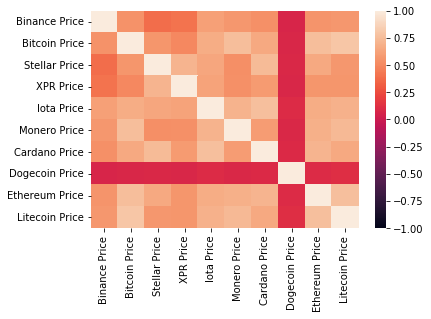

In [103]:
# heatmap on coorelation 
sns.heatmap(correlation, vmin=-1, vmax=1)

In [104]:
#total coorelation 
total_correlation= correlation.sum(axis=1).sort_values()
total_correlation

Dogecoin Price    1.847723
Binance Price     5.292658
XPR Price         5.600845
Stellar Price     5.916045
Monero Price      6.242891
Bitcoin Price     6.364468
Cardano Price     6.378684
Ethereum Price    6.499705
Iota Price        6.512648
Litecoin Price    6.514585
dtype: float64

## Reasoning behind porfolios

### Dogecoin is the coin that least coorelates with the rest of the group
### Choosing assets with low correlation with each other can help to reduce the risk of a portfolio
### we will use correlation and volatility entandum to asess risk. 
### Even though bitcoin and ethereum are still highly correlated to other stocks, they make up a large market capitalization of the crypto market and are therefore assumed to be safer.

## we will use daily percent returns going forward

,Binance Price,Bitcoin Price,Stellar Price,XPR Price,Iota Price,Monero Price,Cardano Price,Dogecoin Price,Ethereum Price,Litecoin Price
Date,,,,,,,,,,
2018-01-02,1.031953,1.097375,1.148927,1.068293,1.020513,1.086750,1.085161,1.037105,1.141297,1.124722
2018-01-03,1.100592,1.127312,1.827558,1.331707,1.058974,1.151895,1.538023,1.060728,1.251907,1.087781
2018-01-04,1.081657,1.129060,1.433168,1.331707,1.051282,1.098478,1.572629,1.107744,1.249236,1.060785
2018-01-05,1.760947,1.261058,1.310025,1.224390,0.964103,1.065234,1.416837,1.446186,1.279497,1.093287
2018-01-06,2.674556,1.277235,1.419761,1.292683,1.023077,1.175768,1.475071,1.685872,1.334689,1.240654
...,...,...,...,...,...,...,...,...,...,...
2021-08-20,53.830769,3.668603,0.794142,0.616185,0.282595,0.841826,3.496554,36.168933,4.364631,0.815061
2021-08-21,53.093491,3.635267,0.766543,0.593478,0.273782,0.859188,3.469124,34.393985,4.284560,0.797878
2021-08-22,53.098225,3.663434,0.768729,0.597922,0.298215,0.913742,3.854811,35.520627,4.304149,0.825544


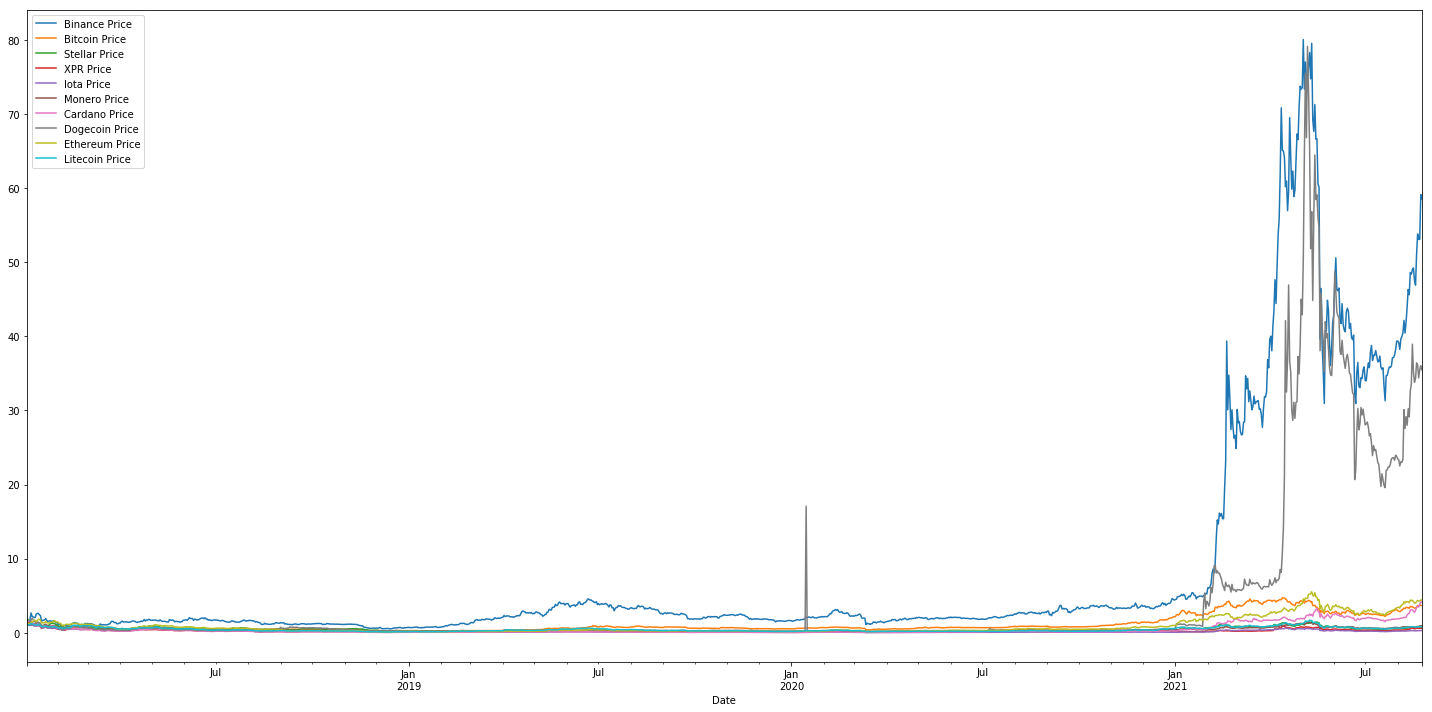

In [105]:
#cumulative returns based on seven day percent change for all coins
cumulative_returns = (1 + pricechange_df).cumprod()

cumulative_returns.plot(figsize=(25,12))
cumulative_returns=cumulative_returns.dropna()
cumulative_returns

# Portfolio Allocation

## TEST

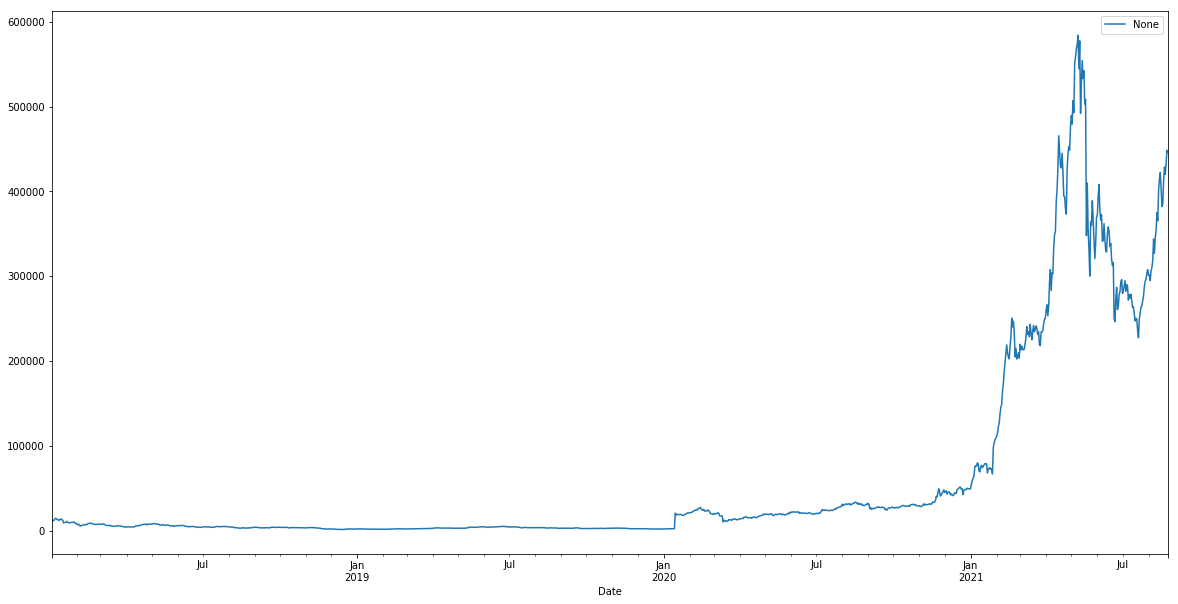

In [107]:
#amount of each stock
# omni crypto test
weights = [0.1, 0.1,.1,.1,.1,.1,.1,.1,.1,.1]
portfolio_returns = pricechange_df.dot(weights)
portfolio_returns.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(legend=True, figsize=(20,10))

## conservative

### Cumulative returns on a 10K investment

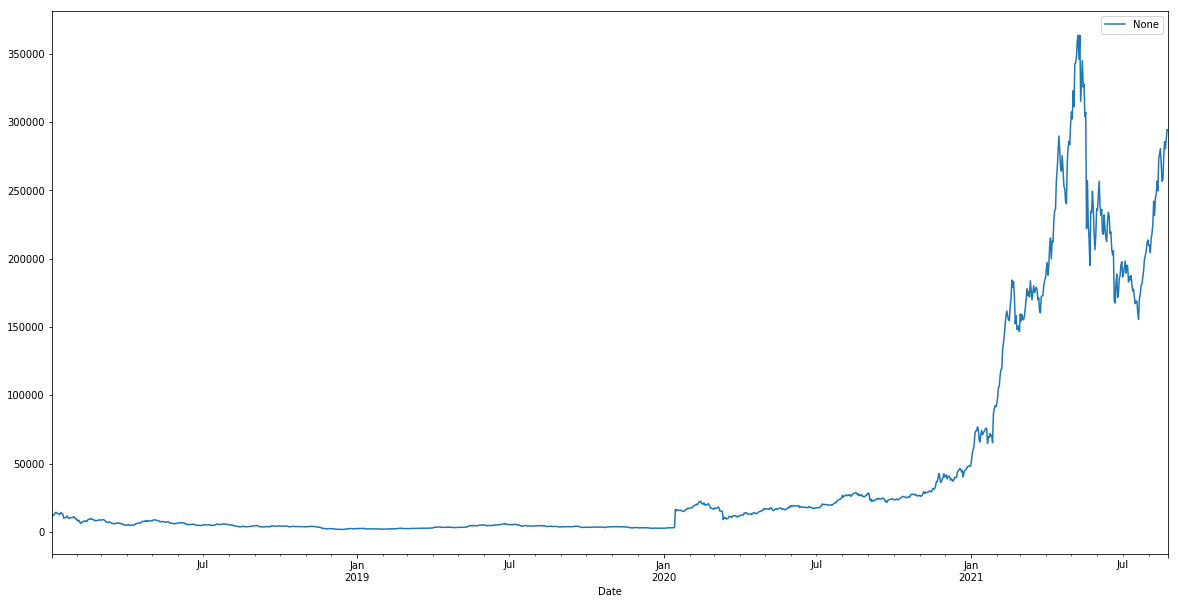

In [110]:
# omni crypto conservative blue
#'Binance Price','Bitcoin Price' 25%,'Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price '25%,'Litecoin Price'
weights_conservative = [0.0625, 0.25,.0625,.0625,.0625,.0625,.0625,.0625,.25,.0625]
portfolio_returns_conservative = pricechange_df.dot(weights_conservative)
portfolio_returns_conservative.head()

initial_investment = 10000
`

cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(legend=True, figsize=(20,10))

### Sharpe Ratio

In [130]:
# Calculate Annualized Sharpe Ratio 
conservative_sharpe_ratio= (portfolio_returns_conservative.mean()*365) / (portfolio_returns_conservative.std() * np.sqrt(365))
conservative_sharpe_ratio

print(f"Omni-Krypto Blue (Conservative) Porfolio's Sharpe Ratio is: {conservative_sharpe_ratio}")

Omni-Krypto Blue (Conservative) Porfolio's Sharpe Ratio is: 0.886253377955893


# omni crypto Aggressive green

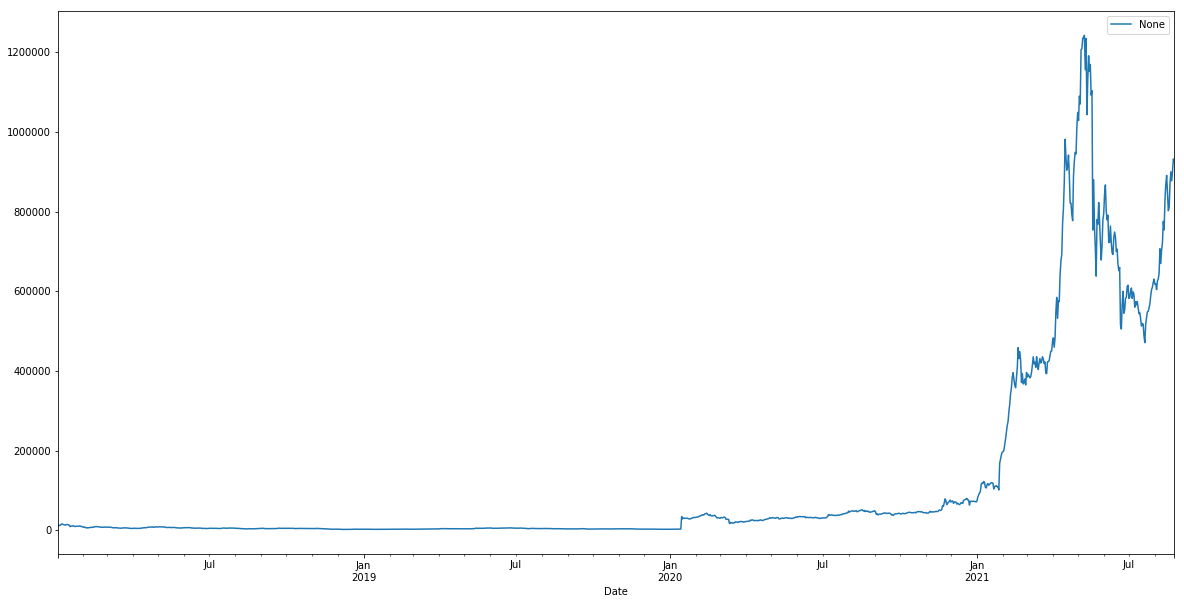

In [134]:
#Cumulative Returns
# omni crypto Aggressive green
'Binance Price','Bitcoin Price','Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price','Litecoin Price'
weights = [0.15, 0.067,.15,.15,.066,.066,.067,.15,.067,.067]
portfolio_returns_aggresive = pricechange_df.dot(weights)
portfolio_returns_aggresive.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(legend=True, figsize=(20,10))

# Sharpe Ratio

In [135]:
# Calculate Annualized Sharpe Ratio 
aggresive_sharpe_ratio= (portfolio_returns_aggresive.mean()*365) / (portfolio_returns_aggresive.std() * np.sqrt(365))
aggresive_sharpe_ratio

print(f"Omni-Krypto Green (Aggresive) Porfolio's Sharpe Ratio is: {conservative_sharpe_ratio}")

Omni-Krypto Green (Aggresive) Porfolio's Sharpe Ratio is: 0.886253377955893


# Conservative

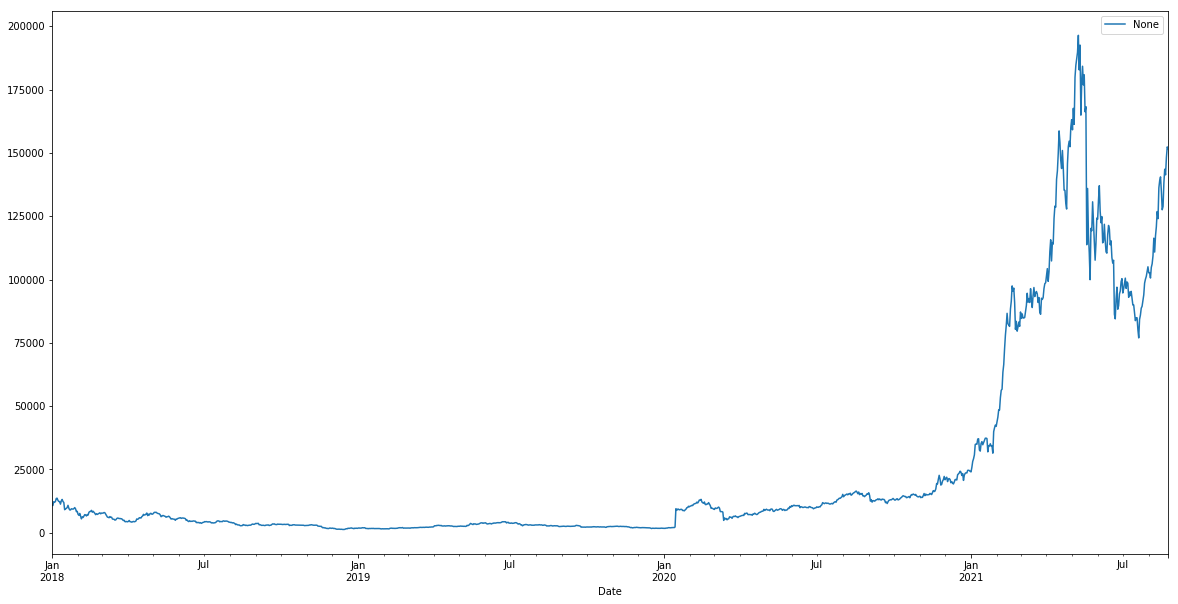

In [45]:
#amount of each stock
# omni crypto Moderate yellow
'Binance Price','Bitcoin Price','Stellar Price', 'XPR Price','Iota Price', 'Monero Price','Cardano Price', 'Dogecoin Price','Ethereum Price','Litecoin Price'

weights = [0.05, 0.1,.05,.05,.15,.15,.15,.05,.1,.15]
portfolio_returns = pricechange_df.dot(weights)
portfolio_returns.head()

initial_investment = 10000


cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(legend=True, figsize=(20,10))

In [3]:
# start a poll at the begining of class. 

# charts that validate porfolio allocation- coorelation, heat map- before portfolios are created
# for each portfolio: sharpe rato, cumulative returns, monte carlo (?) 

# plot all together. and use a new library 

# wrapping up? review pole results. 

In [92]:
df = MCSimulation(
    portfolio_data = prices_df,
    
    weights = [0.1, 0.1,.1,.1,.1,.1,.1,.1,.1,.1],
    num_simulation = 500,
    num_trading_days = 365*10
)
df.portfolio_data.head()

IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
df.calc_cumulative_return()

,Binance Price,Bitcoin Price,Stellar Price,XPR Price,Iota Price,Monero Price,Cardano Price,Dogecoin Price,Ethereum Price,Litecoin Price
Binance Price,1.000000,0.617582,0.496024,0.488447,0.572903,0.587852,0.537172,0.038424,0.612633,0.597919
Bitcoin Price,0.617582,1.000000,0.615823,0.591237,0.710640,0.755615,0.678079,0.022190,0.807039,0.784878
Stellar Price,0.496024,0.615823,1.000000,0.716766,0.678809,0.614206,0.760861,0.038162,0.673453,0.634278
XPR Price,0.488447,0.591237,0.716766,1.000000,0.685428,0.588318,0.637123,0.015325,0.654501,0.645542
Iota Price,0.572903,0.710640,0.678809,0.685428,1.000000,0.708330,0.735537,0.067560,0.758756,0.724791
Monero Price,0.587852,0.755615,0.614206,0.588318,0.708330,1.000000,0.670958,0.066343,0.742073,0.721328
Cardano Price,0.537172,0.678079,0.760861,0.637123,0.735537,0.670958,1.000000,0.031575,0.754739,0.698627
Dogecoin Price,0.038424,0.022190,0.038162,0.015325,0.067560,0.066343,0.031575,1.000000,0.021561,0.019952
Ethereum Price,0.612633,0.807039,0.673453,0.654501,0.758756,0.742073,0.754739,0.021561,1.000000,0.810607
Litecoin Price,0.597919,0.784878,0.634278,0.645542,0.724791,0.721328,0.698627,0.019952,0.810607,1.000000


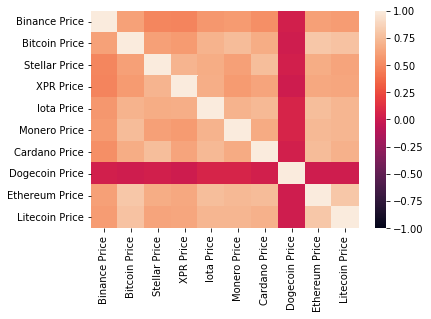

In [42]:
correlation = pricechange_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
correlation

In [ ]:
print(priceschange7..to_markdown())

In [ ]:
#Questions & Data

##Elaborate on the questions you asked, describing what kinds of data you needed to answer them and where you found it.

In [ ]:
#Data Cleanup & Exploration

##Describe the exploration and cleanup process.
##Discuss insights you had while exploring the data that you didn't anticipate.
##Discuss any problems that arose after exploring the data, and how you resolved them.
##Present and discuss interesting figures developed during exploration, ideally with the help of Jupyter Notebook.

In [ ]:
#Data Analysis

##Discuss the steps you took to analyze the data and answer each question you asked in your proposal.
##Present and discuss interesting figures developed during analysis, ideally with the help of Jupyter Notebook.

In [ ]:
#Postmortem

##Discuss any difficulties that arose, and how you dealt with them.
##Discuss any additional questions that came up, but which you didn't have time to answer: 
##What would you research next, if you had two more weeks?

In [ ]:
#Questions

##Open-floor Q&A with the audience